## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [21]:
train, test = keras.datasets.cifar10.load_data()

In [43]:
## 資料前處理
"""
Your code here
"""

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
def preproc_x(x):
    x = x.astype("float32")
    x = x.reshape(x.shape[0],-1)
    x = scaler.fit_transform(x)
    return x

def preproc_y(y):
    y = keras.utils.to_categorical(y, num_classes=10)
    return y

In [44]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 10)
(10000, 10)


In [46]:
"""Code Here
建立你的神經網路
"""
from keras.models import Sequential
from keras.layers import Dense

def build_mlp():
    model = Sequential()
    model.add(Dense(units=256, 
                input_dim=3072,
                kernel_initializer='normal', 
                activation='relu'))
    model.add(Dense(units=128,
                kernel_initializer='normal', 
                activation='relu'))
    model.add(Dense(units=10,
                kernel_initializer='normal', 
                activation='softmax'))
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [47]:
"""
訓練模型
"""
def complie_train_model(model, optimizer,epochs, batch_size, x_train, y_train, x_test, y_test):
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
          epochs= epochs, 
          batch_size=batch_size, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    return model

In [48]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [49]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model = complie_train_model(model, optimizer,EPOCHS, BATCH_SIZE, x_train, y_train, x_test, y_test)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 349us/step - loss: 2.2929 - acc: 0.2727 - val_loss: 2.0111 - val_acc: 0.3274
Epoch 2/100
50000/50000 [==============================] - 14s 272us/step - loss: 1.9542 - acc: 0.3144 - val_loss: 1.9329 - val_acc: 0.3288
Epoch 3/100
50000/50000 [==============================] - 18s 366us/step - loss: 1.9283 - acc: 0.3123 - val_loss: 1.9419 - val_acc: 0.2770
Epoch 4/100
50000/50000 [==============================] - 26s 521us/step - loss: 1.9379 - acc: 0.3051 - val_loss: 1.9267 - val_acc: 0.3580
Epoch 5/100
50000/50000 [==============================] - 16s 319us/step - loss: 1.8472 - acc: 0.3734 - val_loss: 1.8898 - val_acc: 0.3472
Epoch 6/100
50000/50000 [==============================] - 23s 451us/step - loss: 1.8638 - acc: 0.3055 - val_loss: 1.8733 - val_acc: 0.3331
Epoch 13/100
50000/50000 [==============================] - 27

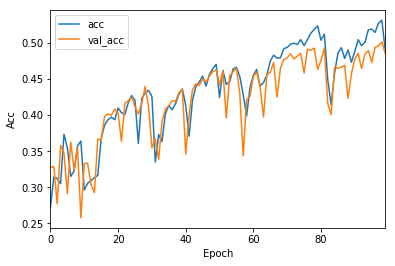

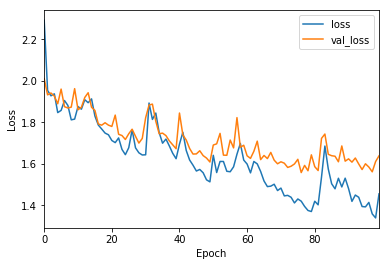

In [52]:
# 以視覺畫方式檢視訓練過程
import pandas as pd

def show_train_history(model):
    df = pd.DataFrame(model.history.history)
    
    df1 = df[["acc", "val_acc"]]
    df2 = df[["loss", "val_loss"]]    
    
    g1 = df1.plot.line()
    g1.set_xlabel("Epoch")
    g1.set_ylabel("Acc")
    
    g2 = df2.plot.line()
    g2.set_xlabel("Epoch")
    g2.set_ylabel("Loss")
    return df

df = show_train_history(model)

In [51]:
df

,val_loss,val_acc,loss,acc
0,2.011063,0.3274,2.292903,0.27268
1,1.932869,0.3288,1.954194,0.31436
2,1.941891,0.2770,1.928288,0.31226
3,1.926677,0.3580,1.937851,0.30512
4,1.889798,0.3472,1.847237,0.37338
5,1.960721,0.2914,1.857953,0.35454
6,1.875858,0.3627,1.905589,0.31512
7,1.869529,0.3232,1.881879,0.32252
8,1.873724,0.3556,1.812349,0.35732
9,1.962864,0.2577,1.815917,0.36394


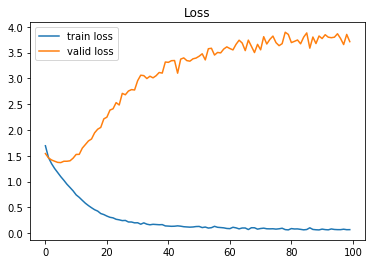

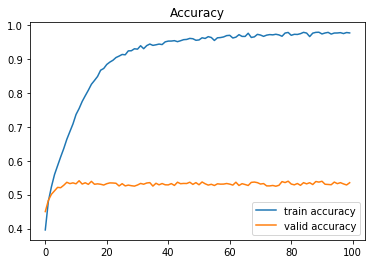

In [12]:
# import matplotlib.pyplot as plt


# train_loss = model.history.history["loss"]
# valid_loss = model.history.history["val_loss"]

# train_acc = model.history.history["acc"]
# valid_acc = model.history.history["val_acc"]

# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
# plt.legend()
# plt.title("Loss")
# plt.show()

# plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
# plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
# plt.legend()
# plt.title("Accuracy")
# plt.show()